In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [25]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

config = tf.ConfigProto(device_count = {'GPU': 0})
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True

In [35]:
data_corpus_path = "/datb/aphasia/languagedata/corpus/dataset/datasetboundary_tsne_4ms.csv"

df_corpus_data = pd.read_csv(data_corpus_path, sep=',', skiprows=1, nrows=5000000,
                             names=['region', 'label', 'sample_rate', 'begin', 'end', 'audiopath'])

# Voor het weghalen van 'nan' rows in de column "region"
df_corpus = df_corpus_data.dropna(subset=['region'])


len(df_corpus['label'].unique())


716

In [27]:
# # Get input data
X = []

for x in df_corpus.region:
    trans = [float(y) for y in x.split('|')] # 0,1
    X.append(trans)

# # Get labels
y = [(x) for x in df_corpus.label]

print(x)


0.05742861114018325|0.2037631002357035|0.17867749192498153|-1.8456190154023262|-1.7019323077066217|-2.026049043418003|1.2391490437507402|-0.1012117502952548|-2.2354402075340536|-0.4842933113207753|-1.6387320718849487|-2.6530640925552484|-0.31953349453487884|-0.03358985602899196|0.15966683431193437|0.832030898578032|-1.706728544278428|-2.549920377607138|-2.5025219048211294|1.0108582410294311|-0.4831737141678897|-2.730130313012048|-2.1292200812546227|-0.7904911848068721|-1.1856952486939332|-0.28551906712695646|-0.08441818216548569|0.051654890405615814|0.8212210638195074|-0.945318835096851|0.19330898534276741|-1.5759553468800394|0.5809352010835042|-0.29869570205673457|-0.4212908135404664|-0.7021101011305312|0.6002630349935281|1.285836154447109|1.831472195263099|-0.01643656025804603|0.3989278256511614|0.6337131644738033|-0.19736872071225803|-0.49931947096150253|-0.031685828455400154|0.5573412448340133|0.6992012978610741|1.1426731810637705|-1.263050620051922|0.777539519735986|1.071841141111

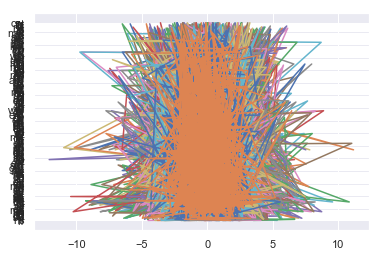

In [28]:
plt.plot(X,y,)

plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)

In [31]:
kmeans = KMeans(n_clusters=183, random_state=0).fit(X_train)
ymeans = KMeans().fit_predict(X_test)
print(kmeans.labels_[::10])
print(ymeans)

[125  78   1  71  27   4  19  54  29  16   1  27  39  74 100  45  35 109
  61  41  90 113  51  93 140  43   1  58 142 143  33 142  27  15]
[7 7 6 0 3 3 3 1 4 0 1 0 6 1 4 4 1 4 4 7 3 7 1 4 0 7 0 7 4 7 1 1 0 7 7 7 6
 7 0 4 4 4 0 0 3 6 7 3 0 7 7 0 3 6 1 7 0 2 0 0 0 6 0 1 7 3 0 7 1 0 3 4 7 0
 3 5 7 7 4 3 1 5 4 1 6 0 5 3 4 7 4 7 0 3 3 6 6 7 1 7 1 6 4 3 1 1 0 1 6 7 7
 0 0 7 4 7 4 7 3 3 7 6 6 1 1 6 7 6 4 7 1 7 4 4 7 7 7 6 6 7 6 7 7 3 6 6 6 0
 1 7 6 3 1 6 6 6 6 0 0 0 7 0 0 7 7]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        X = pd.DataFrame(data.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data.target, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self